In [1]:
import pandas as pd
import io
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/customer segmentation/Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


Mounted at /content/drive


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


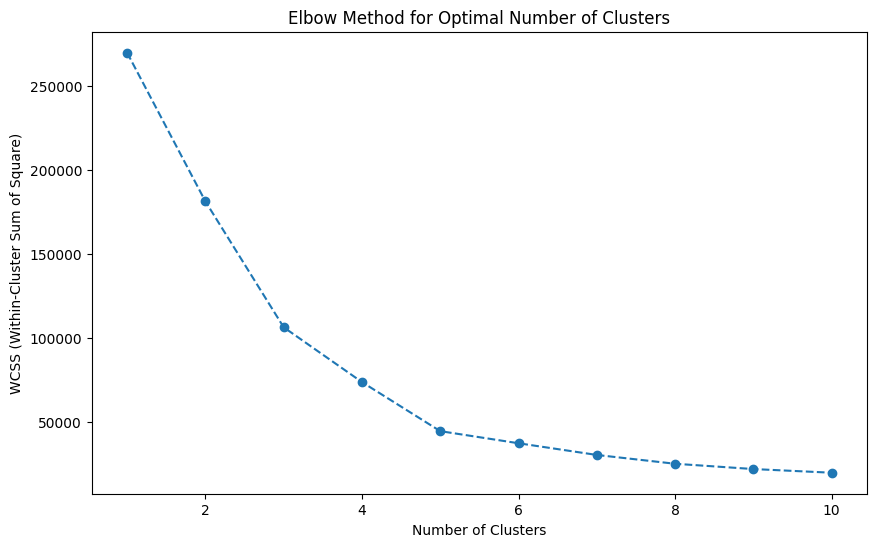

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Select the relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()


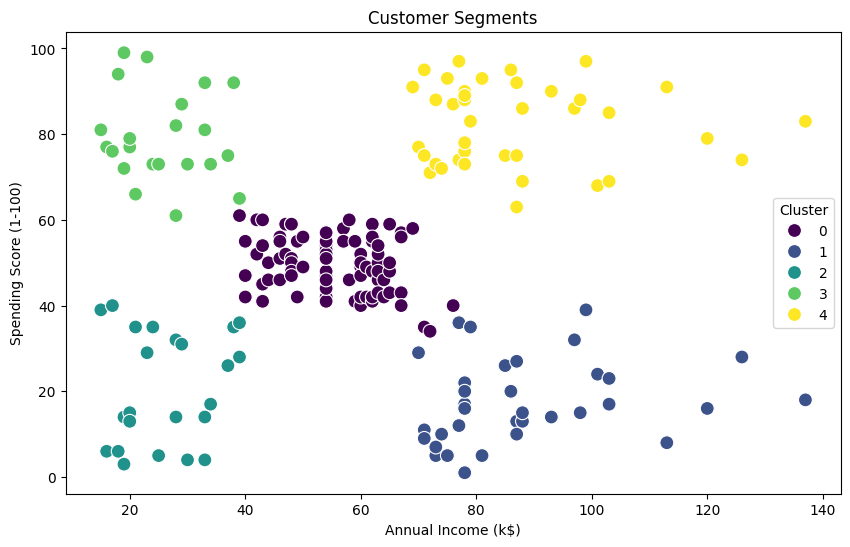

In [3]:
# Apply K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()